In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import torch

In [6]:
data_dir = '/Users/tiendzung/Project/YOLO/data'
os.chdir(data_dir)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=335x500 at 0x1283FDD60>


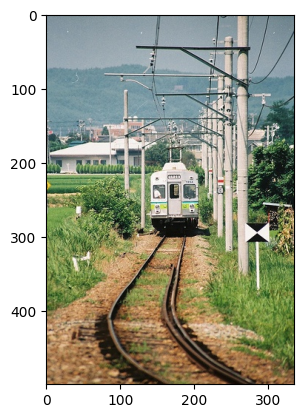

In [13]:
# Read the image
img = Image.open('images/000002.jpg')
plt.imshow(img)


In [79]:
annotations = pd.read_csv('8examples.csv', sep=',')
print(annotations)

          img       label
0  000007.jpg  000007.txt
1  000009.jpg  000009.txt
2  000016.jpg  000016.txt
3  000019.jpg  000019.txt
4  000020.jpg  000020.txt
5  000021.jpg  000021.txt
6  000122.jpg  000122.txt
7  000129.jpg  000129.txt


In [37]:
annotations.iloc[0, 1]

'000007.txt'

In [52]:
with open('labels/009960.txt', 'r') as f:
    for label in f.readlines():
        class_label, x, y, w, h = label.split()
        class_label = int(class_label)
        x = float(x)
        y = float(y)
        w = float(w)
        h = float(h)
        print(type(class_label), type(x), type(y), type(w), type(h))
            

<class 'int'> <class 'float'> <class 'float'> <class 'float'> <class 'float'>
<class 'int'> <class 'float'> <class 'float'> <class 'float'> <class 'float'>


In [69]:
def __getitem__(annotations, index, S, B, C):
    label_path = os.path.join(data_dir, 'labels', annotations.iloc[index, 1])
    boxes = []
    with open(label_path, 'r') as f:
        for label in f.readlines():
            class_label, x, y, w, h = label.split()
            boxes.append([int(class_label), float(x), float(y), float(w), float(h)])

    img_path = os.path.join(data_dir, 'images', annotations.iloc[index, 0])
    img = Image.open(img_path) ## No transfromation

    ## Convert to grid cell
    label_matrix = torch.zeros((S, S, C + 5 * B))
    for box in boxes:
        class_label, x, y, w , h = box

        ## i, j represents the cell row and cell column
        i, j = int(S * y), int(S * x)
        x_cell, y_cell = S * x - j, S * y - i

        '''
        width_cell = widyh_pixel/(image_width_pixel/S) = width_pixel*S/image_width_pixel = w*s
        '''
        width_cell, height_cell = (w*S, h*S)
        if label_matrix[i, j, C] == 0:
            label_matrix[i, j, C] = 1
            label_matrix[i, j, C + 1 : C + 5] = torch.tensor([x_cell, y_cell, width_cell, height_cell])
            label_matrix[i, j, class_label] = 1
    
    return img, label_matrix


In [84]:
import torchvision.transforms as transforms


torch.Size([7, 7, 30])


tensor([[[0.2157, 0.1176, 0.0745,  ..., 0.2353, 0.2235, 0.1373],
         [0.5608, 0.4431, 0.0588,  ..., 0.2235, 0.3059, 0.2078],
         [0.5373, 0.5020, 0.0784,  ..., 0.1961, 0.2471, 0.2314],
         ...,
         [0.3059, 0.3725, 0.2353,  ..., 0.0588, 0.0784, 0.0784],
         [0.3098, 0.4157, 0.2118,  ..., 0.0588, 0.0902, 0.0824],
         [0.3137, 0.3373, 0.1765,  ..., 0.0549, 0.0824, 0.0745]],

        [[0.1294, 0.0784, 0.0980,  ..., 0.3451, 0.3294, 0.2353],
         [0.5137, 0.4314, 0.0902,  ..., 0.3255, 0.4078, 0.3059],
         [0.5608, 0.5373, 0.1255,  ..., 0.2824, 0.3451, 0.3333],
         ...,
         [0.3804, 0.4510, 0.3294,  ..., 0.0667, 0.0863, 0.0863],
         [0.3725, 0.4863, 0.2941,  ..., 0.0667, 0.0980, 0.0902],
         [0.3569, 0.4000, 0.2588,  ..., 0.0627, 0.0902, 0.0824]],

        [[0.0980, 0.0431, 0.0588,  ..., 0.2353, 0.2157, 0.1216],
         [0.4706, 0.3882, 0.0431,  ..., 0.2118, 0.2941, 0.1843],
         [0.5059, 0.4824, 0.0667,  ..., 0.1686, 0.2275, 0.

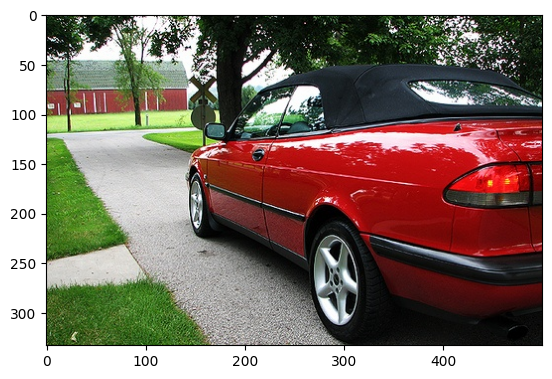

In [95]:
img, label_matrix = __getitem__(annotations, 0, 7, 2, 20)
print(label_matrix.shape)
plt.imshow(img)
# img = np.array(img)
transform = transforms.Compose([transforms.Resize((448, 448)), 
                                transforms.ToTensor(),
                                transforms.ConvertImageDtype(torch.float)])
transform(img)

In [96]:
img, label_matrix = __getitem__(annotations, 0, 7, 2, 20)
print(label_matrix.shape)
mask = label_matrix[..., 20] == 1
print(mask.shape)

torch.Size([7, 7, 30])
torch.Size([7, 7])
